# Applying DBSCAN algorithm for wine dataset

The wine quality dataset is avaialble in UCI machine learning websit, but its having much bad records. I have cleaned it manually before using it here, you can download by clicking link. https://1drv.ms/u/s!AjQ5kZ9kJsZKiocz7xwa6SubiYC0YQ?e=3TNHLF

DBSCAN, or Density-Based Spatial Clustering of Applications with Noise, is an unsupervised machine learning algorithm. Unsupervised machine learning algorithms are used to classify unlabeled data. In other words, the samples used to train our model do not come with predefined categories.

In [143]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [144]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
#sb.set_style['whitegrid']

In [145]:
cd

C:\Users\Karthik


In [146]:
cd "C:\Users\Karthik\Pictures\LinkedIn tasks\Datasets"

C:\Users\Karthik\Pictures\LinkedIn tasks\Datasets


In [147]:
df = pd.read_csv("winequalityN.csv")

In [148]:
df.head()

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


I'm just using fixed acidity and volatile acidity here as if I consider all the parameters the output is not quite good. If you want you can play around and also change eps and min points parameters.

In [149]:
data = df.iloc[:,1:3]

eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.
metric: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

In [150]:
model = DBSCAN(eps =0.2, min_samples=20).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=None, p=None)


Core point: A selected point is a core point if it has at least minimum number of points (MinPts) including itself within its epsilon-neighborhood. If we’ve a core point, it means it is a dense region.

Border point: A selected point that is within a neighborhood of a core point but it itself cannot be a core point. If we’ve a border point, it means the point is in a vicinity or at the border of dense region.

Noise point: A selected point that is neither a core point nor a border point. It means these points are outliers that are not associated with any dense clusters.

# Print each cluster count

Here you can able to check how many records are there in each cluster. For example -1 represents outliers which is about 117 records and 2 is a cluster with 25 records.

In [151]:
print(Counter(model.labels_))

Counter({0: 6281, -1: 117, 1: 40, 2: 25})


In [152]:
outliers_df = pd.DataFrame(data)

# Print the outliers

In [153]:
print(outliers_df[model.labels_==-1])

      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
2848            4.2             0.170
3239            4.2             0.215
3684            4.7             0.670
3875            4.8             0.650
3889            4.7             0.455
4013            6.1             1.100
4233            3.8             0.310
4420            4.4             0.460
4444            4.7             0.145
4653            4.7             0.335
4760            4.4             0.320
4761            3.9             0.225
4766            4.7             0.785
4821            4.4             0.540
4873           11.2             0.280
4908            5.7             1.130
4915            4.6             0.520
4964            5.0             1.020
4965            4.7             0.600
4990            7.3             1.070
4996        

# Visualization method 1 (Default system colours)

Text(0.5, 1.0, 'DBSCAN for outlier detection')

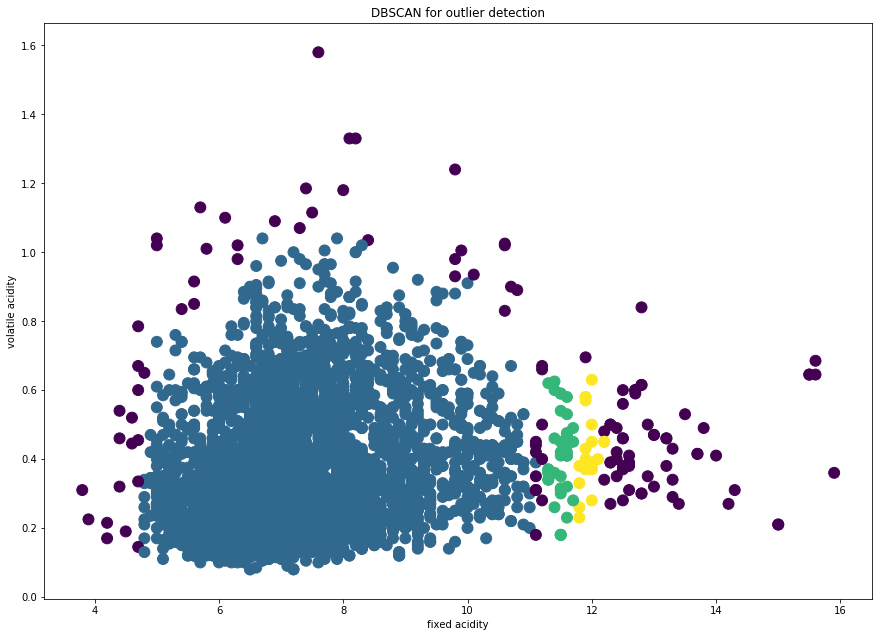

In [154]:
fig = plt.figure()

ax = fig.add_axes([.1,.1, 2.3,2])

colors = model.labels_

#ax.scatter(data[:,3], data[data:,2], c=colors, s=120)
ax.scatter(data.iloc[:,0].values,data.iloc[:,1].values,c=colors, s=120)

ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')

plt.title('DBSCAN for outlier detection')

# Customize your own colours for each cluster and outlier

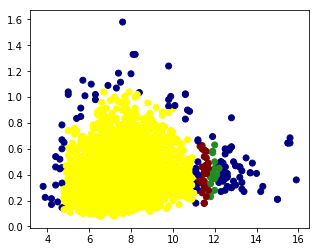

In [155]:
model.fit(data)
clusters = model.labels_
colors = ['yellow', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(data.iloc[:,0].values, data.iloc[:,1].values, c=vectorizer(clusters))

# Both the figure 1 and figure 2 are same except we can able to change some default colours. Here from figure 2 we can able to see that blue dots are outliers and we can notice how far they are located from other clusters. In this way we can identify the outliers through DBSCAN and omit those records before creating a model.